## Exercise 2 - Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces a scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). A linear regression model learned from the data *without* the protected characteristic (gender) should have slope close to 100.0

Now edit the code to simulate the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45) ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios. Explain this observation using the causal models on pp. 48-50 of the slides of Lecture 8.

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

In [3]:
data

,Gender,Hours,Salary
0,1,37,3831.615905
1,0,27,2563.983328
2,1,34,3460.982264
3,1,30,3389.089226
4,1,30,2546.446242
...,...,...,...
4995,1,33,2895.133103
4996,0,33,2753.480149
4997,0,29,3161.880285
4998,1,26,2483.632266


### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

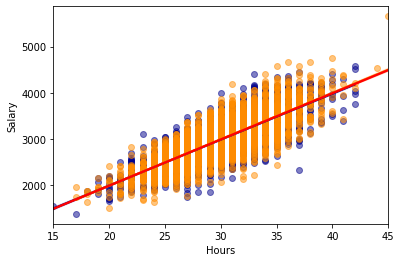

In [4]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

## Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [5]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 100.0


## (a) Direct discrimination
The salary of women is reduced by 200 euros (first run the first cell again).

In [6]:
dataA = data.copy()
dataA.loc[dataA['Gender'] == 1, ['Salary']] -= 200

In [7]:
dataA

,Gender,Hours,Salary
0,1,37,3631.615905
1,0,27,2563.983328
2,1,34,3260.982264
3,1,30,3189.089226
4,1,30,2346.446242
...,...,...,...
4995,1,33,2695.133103
4996,0,33,2753.480149
4997,0,29,3161.880285
4998,1,26,2283.632266


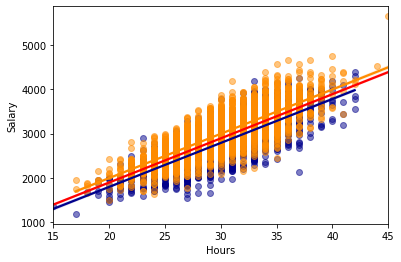

In [8]:
sns.regplot(x="Hours", y="Salary", data=dataA[dataA["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=dataA[dataA["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=dataA, marker="None", color="red")

plt.show()

In [9]:
reg = LinearRegression().fit(dataA['Hours'].to_numpy().reshape(-1,1), dataA['Salary'].to_numpy().reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 100.0


## (b) No discrimination
The working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45)

In [10]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

lenWoman = np.count_nonzero(gen == 1)
lenMan = n - lenWoman

# work hours
hrsWoman = np.random.binomial(60, 0.45, size=lenWoman)
hrsMan = np.random.binomial(60, 0.55, size=lenMan)

# salary = 100 * hours + noise (std.deviation 10)
salWoman = hrsWoman * np.random.normal(100, 10, size=lenWoman)
salMan = hrsMan * np.random.normal(100, 10, size=lenMan)

dataAux = []
w = 0
m = 0
for i in range(n):
    if gen[i] == 0:
        dataAux.append([gen[i], hrsMan[m], salMan[m]])
        m += 1
    else:
        dataAux.append([gen[i], hrsWoman[w], salWoman[w]])
        w += 1

# create a nice data frame
dataB = pd.DataFrame(np.array(dataAux) ,columns = ["Gender", "Hours", "Salary"])

In [11]:
dataB

,Gender,Hours,Salary
0,0.0,35.0,3211.305497
1,1.0,26.0,2838.473211
2,0.0,29.0,2949.946203
3,1.0,31.0,3369.338425
4,0.0,38.0,3750.768428
...,...,...,...
4995,0.0,26.0,2500.649834
4996,1.0,35.0,3470.460641
4997,0.0,43.0,4460.456841
4998,0.0,33.0,3137.354072


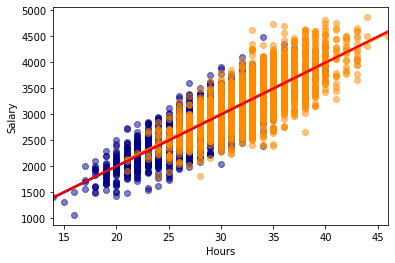

In [12]:
sns.regplot(x="Hours", y="Salary", data=dataB[dataB["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=dataB[dataB["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=dataB, marker="None", color="red")

plt.show()

In [13]:
reg = LinearRegression().fit(dataB['Hours'].to_numpy().reshape(-1,1), dataB['Salary'].to_numpy().reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 99.8


## (c) Indirect discrimination
Both of the above changes at the same time.

In [14]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

lenWoman = np.count_nonzero(gen == 1)
lenMan = n - lenWoman

# work hours
hrsWoman = np.random.binomial(60, 0.45, size=lenWoman)
hrsMan = np.random.binomial(60, 0.55, size=lenMan)

# salary = 100 * hours + noise (std.deviation 10)
salWoman = hrsWoman * np.random.normal(100, 10, size=lenWoman)
salMan = hrsMan * np.random.normal(100, 10, size=lenMan)

dataAux = []
w = 0
m = 0
for i in range(n):
    if gen[i] == 0:
        dataAux.append([gen[i], hrsMan[m], salMan[m]])
        m += 1
    else:
        dataAux.append([gen[i], hrsWoman[w], salWoman[w]])
        w += 1

# create a nice data frame
dataC = pd.DataFrame(np.array(dataAux) ,columns = ["Gender", "Hours", "Salary"])

In [15]:
dataC.loc[dataC['Gender'] == 1, ['Salary']] -= 200

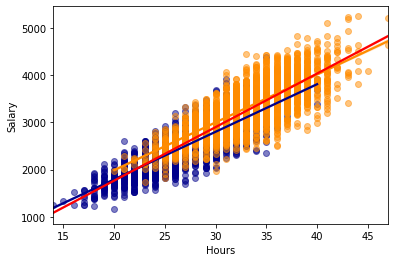

In [16]:
sns.regplot(x="Hours", y="Salary", data=dataC[dataC["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=dataC[dataC["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=dataC, marker="None", color="red")

plt.show()

In [17]:
reg = LinearRegression().fit(dataC['Hours'].to_numpy().reshape(-1,1), dataC['Salary'].to_numpy().reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 113.5


## Conclusion
We can see that the only case that the slope changes is in the last one (indirect discrimination).
In the 1st case we substract 200 euros from all women's salary so the trend is the same for women and men separated by an independent coefficient (the b in the equation ax+b = y).
Then, for the 2nd one the women's salary decreases the same as her hours, so the slope remains unchanged.
For the last case, when we do both things, we observe that as they start in different points with different independent coefficients the slope for all the data changes.
This makes sense according to the slides as we are removing a variable that is related to both the hours and the salary.